In [178]:
# python -m pip install prophet
# here i will try prophet on the loged data so log(x)

In [263]:
import numpy as np
import pandas as pd
import cufflinks as cf
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import plotly.express as px
from datetime import datetime,date
from prophet import Prophet

%matplotlib inline
init_notebook_mode(connected=True)
cf.set_config_file(sharing='private',theme='pearl',offline=True)
#print("Cufflinks Version : {}".format(cf.__version__))

# facebook prophet requires the data to be in 2 colums named ds and y
# ds will be a datetime column with no timezone data and y the label we are forecasting
# ds must NOT be an index like other machine learning algorithms
dfActual = pd.read_csv('./data/BTC-USD.csv')
df = pd.read_csv('./data/btc-usd-max latest.csv')
df.drop(["market_cap", "total_volume"], axis=1, inplace=True)
df['price'].fillna(method='ffill', inplace=True)
df.columns = ['ds','y']
# log data for btc
# df['y'] = np.log(df['y'])
# df['y'].iplot();
dynamic_days = 1550

In [264]:
df['y'].iplot();

In [265]:
df['ds'] = pd.to_datetime(df['ds'])
df['ds'] = df['ds'].dt.tz_localize(None)

In [266]:
df.head()

ds       y
0 2013-04-28  135.30
1 2013-04-29  141.96
2 2013-04-30  135.30
3 2013-05-01  117.00
4 2013-05-02  103.43

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3498 entries, 0 to 3497
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      3498 non-null   datetime64[ns]
 1   y       3498 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 54.8 KB


In [268]:
df['floor'] = 0
df['cap'] = 68500
train = df.iloc[:-dynamic_days]
test = df.iloc[-dynamic_days:]

In [269]:
# This is fitting only on the training data
# now I will include the test data in the training set and forecast 2 months in the future
m = Prophet(weekly_seasonality=False, yearly_seasonality=False, daily_seasonality=False, 
                growth='logistic', seasonality_mode='multiplicative')
m.add_seasonality(name='4-year', period=1350, fourier_order=10)
m.fit(train)
# just a placeholder to hold our future predictions
# periods is how far in the future we want to predict and freq is the frequency of the data
# if we want monthly data then freq='MS'
future = m.make_future_dataframe(periods=dynamic_days,freq = 'D')
future['cap'] = 70000
future['floor'] = 0
# to make predictions 
forecast = m.predict(future)

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [270]:
forecast

ds         trend    cap  floor    yhat_lower    yhat_upper  \
0    2013-04-28     84.787739  70000      0   -825.042887    877.111641   
1    2013-04-29     84.976983  70000      0   -817.769522    939.014076   
2    2013-04-30     85.166648  70000      0   -818.086362    953.063228   
3    2013-05-01     85.356736  70000      0   -839.172295    868.996660   
4    2013-05-02     85.547248  70000      0   -839.629728    893.685008   
...         ...           ...    ...    ...           ...           ...   
3493 2022-11-22  52379.212217  70000      0  32823.767678  34607.312123   
3494 2022-11-23  52408.641101  70000      0  31577.931236  33244.361234   
3495 2022-11-24  52438.037314  70000      0  30188.227421  32044.262323   
3496 2022-11-25  52467.400838  70000      0  28912.075841  30676.696255   
3497 2022-11-26  52496.731653  70000      0  27562.130711  29333.102704   

       trend_lower   trend_upper    4-year  4-year_lower  4-year_upper  \
0        84.787739     84.787739 -0.587186     -0.587186     -0.587186   
1        84.976983     84.976983 -0.589989     -0.589989     -0.589989   
2        85.166648     85.166648 -0.592464     -0.592464     -0.592464   
3        85.356736     85.356736 -0.594603     -0.594603     -0.594603   
4        85.547248     85.547248 -0.596399     -0.596399     -0.596399   
...            ...           ...       ...           ...           ...   
3493  52375.382785  52383.386893 -0.355839     -0.355839     -0.355839   
3494  52404.812528  52412.815421 -0.381311     -0.381311     -0.381311   
3495  52434.209611  52442.211265 -0.406771     -0.406771     -0.406771   
3496  52463.572294  52471.574192 -0.432171     -0.432171     -0.432171   
3497  52492.901012  52500.904577 -0.457466     -0.457466     -0.457466   

      multiplicative_terms  multiplicative_terms_lower  \
0                -0.587186                   -0.587186   
1                -0.589989                   -0.589989   
2                -0.592464                   -0.592464   
3                -0.594603                   -0.594603   
4                -0.596399                   -0.596399   
...                    ...                         ...   
3493             -0.355839                   -0.355839   
3494             -0.381311                   -0.381311   
3495             -0.406771                   -0.406771   
3496             -0.432171                   -0.432171   
3497             -0.457466                   -0.457466   

      multiplicative_terms_upper  additive_terms  additive_terms_lower  \
0                      -0.587186             0.0                   0.0   
1                      -0.589989             0.0                   0.0   
2                      -0.592464             0.0                   0.0   
3                      -0.594603             0.0                   0.0   
4                      -0.596399             0.0                   0.0   
...                          ...             ...                   ...   
3493                   -0.355839             0.0                   0.0   
3494                   -0.381311             0.0                   0.0   
3495                   -0.406771             0.0                   0.0   
3496                   -0.432171             0.0                   0.0   
3497                   -0.457466             0.0                   0.0   

      additive_terms_upper          yhat  
0                      0.0     35.001577  
1                      0.0     34.841518  
2                      0.0     34.708511  
3                      0.0     34.603392  
4                      0.0     34.526935  
...                    ...           ...  
3493                   0.0  33740.669864  
3494                   0.0  32424.646880  
3495                   0.0  31107.774393  
3496                   0.0  29792.507359  
3497                   0.0  28481.287069  

[3498 rows x 18 columns]

<AxesSubplot:xlabel='ds'>

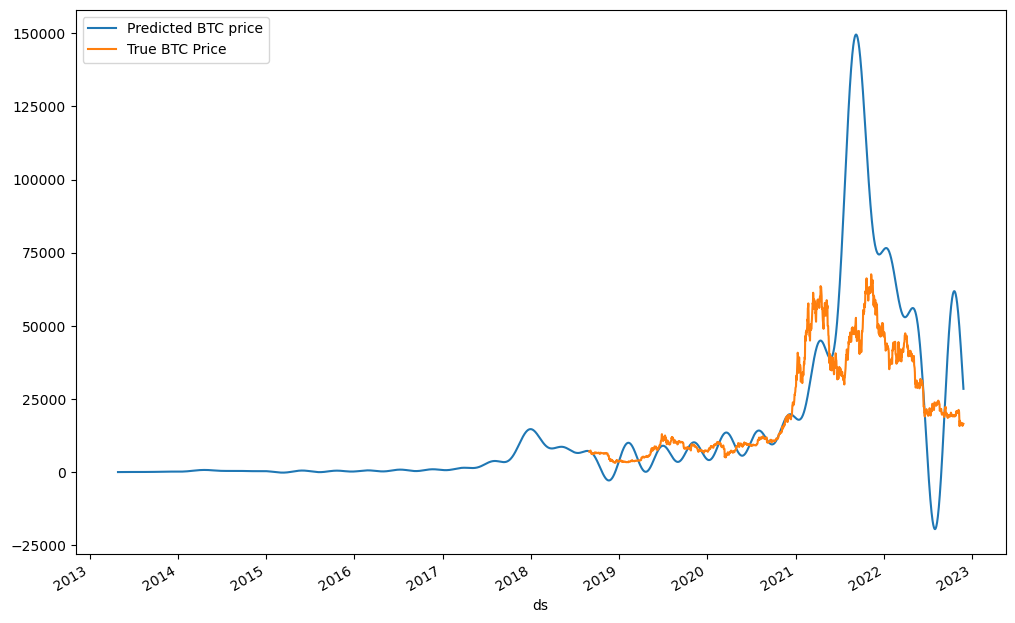

In [271]:
ax = forecast.plot(x='ds',y='yhat',label='Predicted BTC price',legend=True,figsize=(12,8))
test.plot(x='ds',y='y',label='True BTC Price',legend=True,ax=ax)

In [272]:
from statsmodels.tools.eval_measures import rmse

In [273]:
predictions = forecast.iloc[-dynamic_days:]['yhat']

In [274]:
rmse(predictions,test['y'])

26344.88843301751

In [275]:
# very large difference as it is roughly as equal half of the mean
test.mean()

C:\Users\sagap\AppData\Local\Temp\ipykernel_5300\3796774242.py:2: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



y        22244.296704
floor        0.000000
cap      68500.000000
dtype: float64

In [276]:
# prophet has its own diagnostics. we need to define just as done below initial, period and horizon
from prophet.diagnostics import cross_validation,performance_metrics
from prophet.plot import plot_cross_validation_metric

In [277]:
# Initial 5 years training period
initial = 5 * 365
initial = str(initial) + ' days'
# Fold every 1 years
period = 1 * 365
period = str(period) + ' days'
# Forecast 1 year into the future
horizon = 365
horizon = str(horizon) + ' days'

In [278]:
#df_cv = cross_validation(m, initial=initial, period=period, horizon = horizon)

In [279]:
# thgis is the raw dataset that is returned via the above
#performance_metrics(df_cv)

In [280]:
# we can plt a specific metric of the above which shows that mse increases over time so up to 50 days we are ok
# more than that rmse increases a lot
#plot_cross_validation_metric(df_cv, metric='rmse');

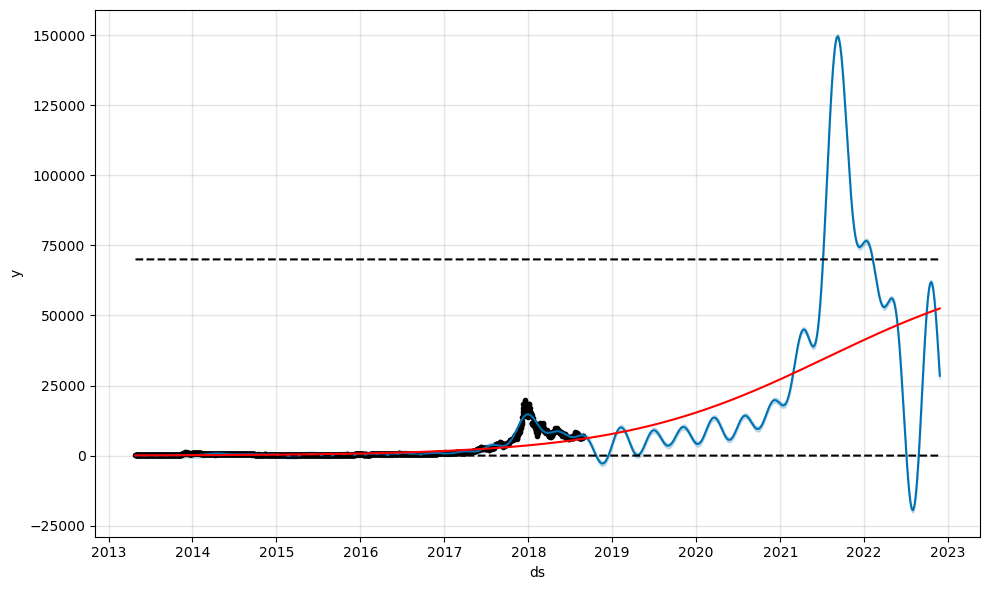

In [281]:
# to see the trend change points
from prophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

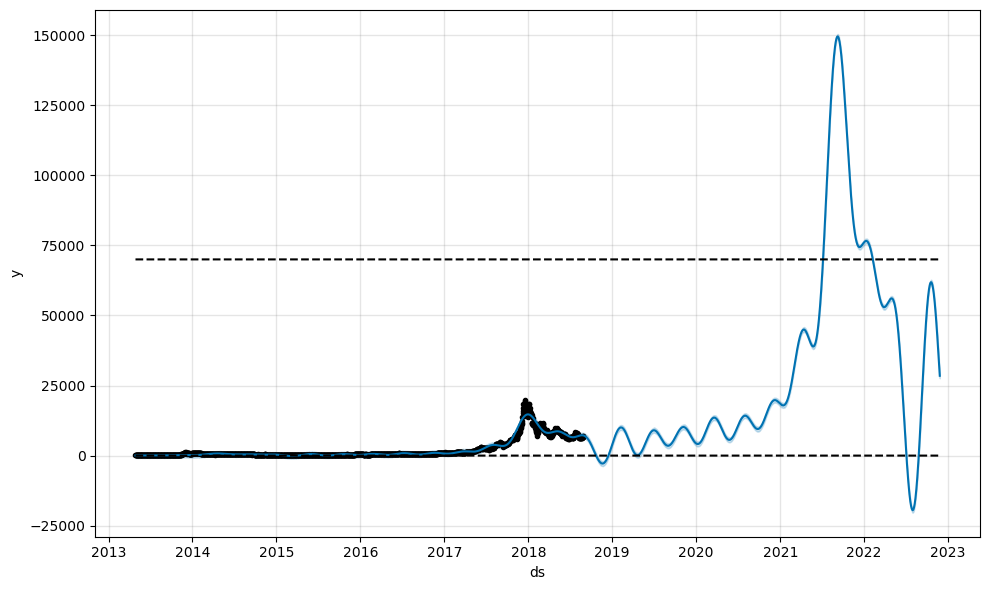

In [282]:
# we can use prophets own tools for plotting and analysis
import matplotlib.pyplot as plt
m.plot(forecast);
# plt.xlim('2014-01-01','2022-01-01') # we can use xlim to limit the data being plotted

In [283]:
# now I will include the test data in the training set and forecast 2 months in the future

m = Prophet(weekly_seasonality=False, yearly_seasonality=False, daily_seasonality=False, 
                growth='logistic', seasonality_mode='multiplicative')
m.add_seasonality(name='4-year', period=1350, fourier_order=10)
m.fit(df)
# just a placeholder to hold our future predictions
# periods is how far in the future we want to predict and freq is the frequency of the data
# if we want monthly data then freq='MS'
future = m.make_future_dataframe(periods=dynamic_days,freq = 'D')
future['cap'] = 70000
future['floor'] = 0
# to make predictions 
forecast = m.predict(future)


C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



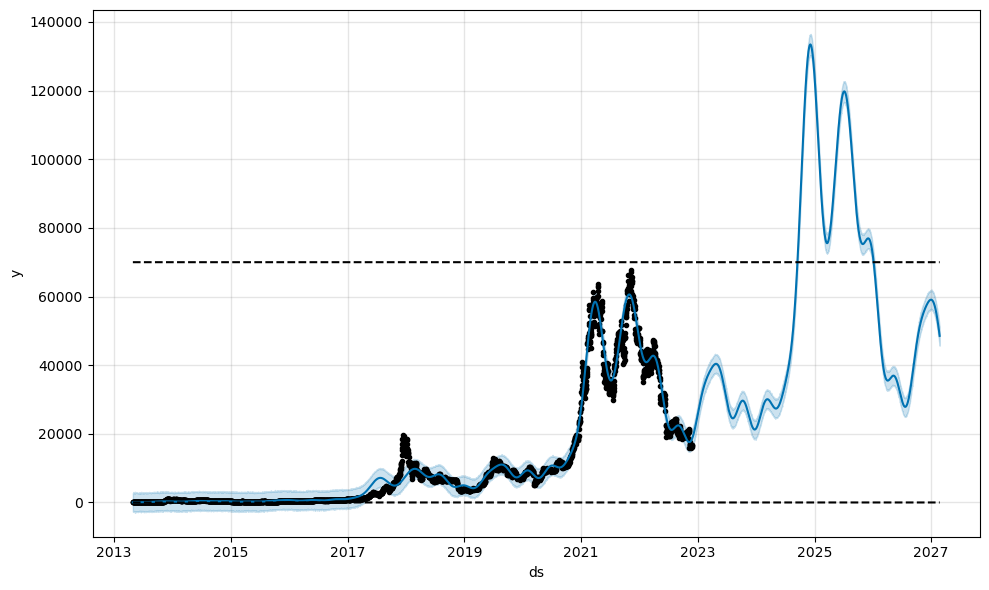

In [284]:
fig = m.plot(forecast)

C:\Users\sagap\anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



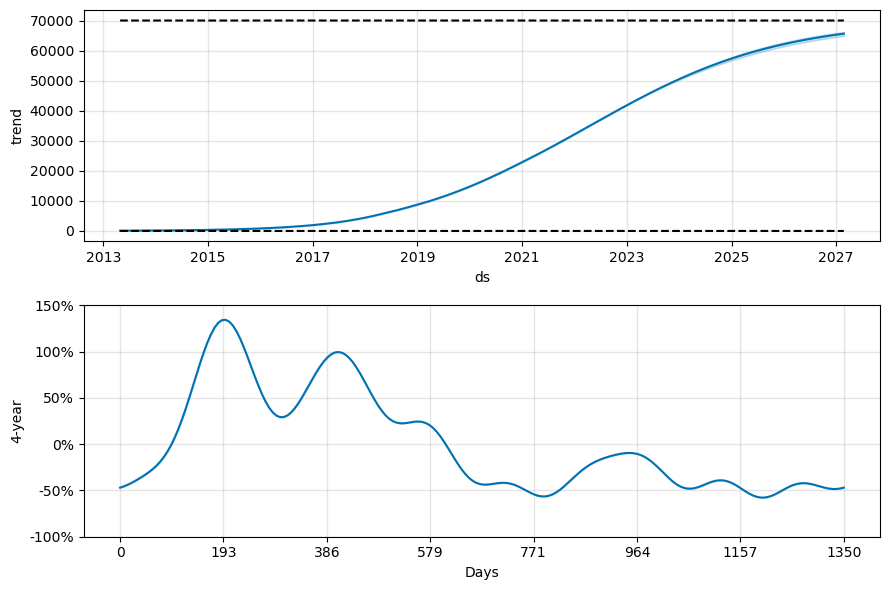

In [285]:
fig = m.plot_components(forecast)

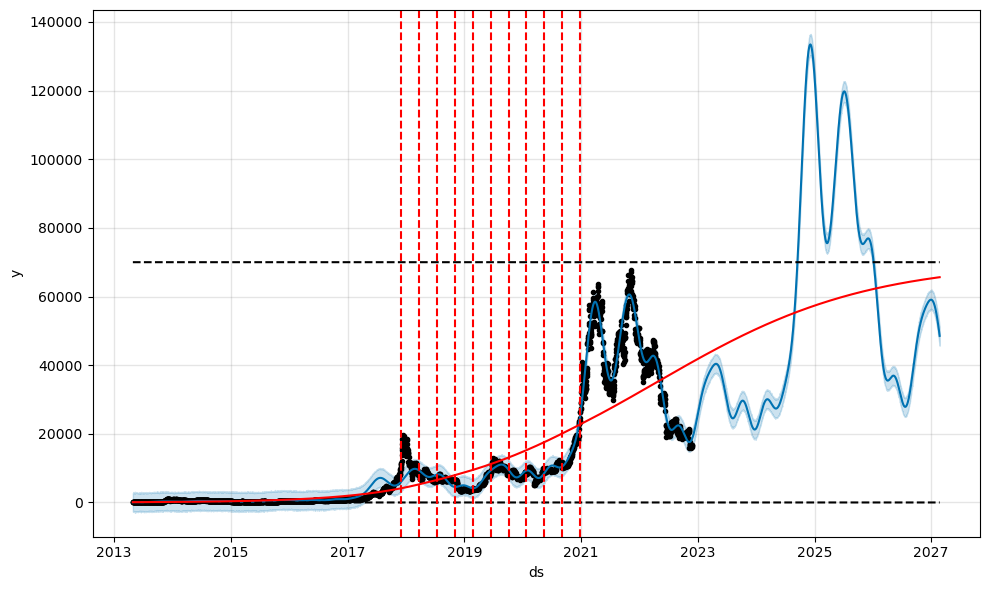

In [286]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [287]:
# final plot but with plotly
forecastPlotly = forecast.copy()
forecastPlotly['date'] = pd.to_datetime(forecastPlotly['ds'])
forecastPlotly = forecastPlotly.set_index('date')
forecastPlotly = forecastPlotly.drop(['ds'], axis=1)
forecastPlotly[['yhat_lower','yhat_upper', 'yhat']].iplot()

In [288]:
dfActual['date'] = pd.to_datetime(dfActual['Date'])
dfActual = dfActual.set_index('date')
dfActual = dfActual.drop(['Date'], axis=1)
result = forecastPlotly.join(dfActual, how='outer')

In [289]:
result[['yhat', 'Close']].iplot()

In [290]:
result[['yhat', 'Close']].iplot(yaxis_type="log")